# 📊 India’s Renewable Energy Journey: A 3-Era State-wise Analysis
### *An Exploratory Data Analysis of Clean Energy Generation Across Pre-COVID, COVID, and Post-COVID Periods (2018–2023)*

---

This project explores the evolution of renewable energy generation across Indian states over three distinct eras:
- **Pre-COVID (2018–2019)**  
- **COVID Era (2020–2021)**  
- **Post-COVID Recovery (2022–2023)**

Through comprehensive exploratory data analysis (EDA), we visualize and compare trends in state-wise renewable energy production, highlight regional disparities, and identify shifts in energy generation patterns triggered by the pandemic.  

The study leverages spatial data, interactive visualizations, animated charts, and time-series comparisons to uncover insights into India’s clean energy transition during a critical period of socio-economic disruption and recovery.

**Data Source**: Central Electricity Authority (CEA), India – State-wise Renewable Energy Generation Reports  
**Tools Used**: Python (Pandas, Plotly, Matplotlib, Seaborn), Jupyter Notebook, OCR tools (pdfplumber, pytesseract), bar_chart_race

---


In [219]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
df_re_long = pd.read_csv(r"C:\Users\rajas\Documents\GitHub\Post-COVID-Energy-Forecasting\data_set\RE_LONG_FORMAT_2017_2023_WITH_GEO_CLEANED.csv")
df_re_long.columns=df_re_long.columns.str.strip().str.lower()

In [221]:
def classify_period(year):
   
    if year in [2018,2019]:
        return "pre-covid (2018-19)"
    if year in [2020,2021]:
        return "During Covid (2020-21)"
    if year in [2022,2023] : 
        return "Post Covid (2021-23)"
    else :
        return "unknown"

In [222]:
df_re_long["period"] = df_re_long['year'].apply(classify_period)

-----------------------

#Average Annual Renewable Energy Generation by Source and Period

In [223]:
summary = df_re_long.groupby(["source", "period"]).agg(
    total_generation=("generation", "sum"),
    num_years=("year", "nunique")
)
summary["avg_per_year"] = summary["total_generation"] / summary["num_years"]

In [224]:
summary


total_generation  num_years  avg_per_year
source      period                                                           
bio_power   During Covid (2020-21)         30545.220          2     15272.610
            Post Covid (2021-23)            8393.160          2      4196.580
            pre-covid (2018-19)            28260.710          2     14130.355
large_hydro During Covid (2020-21)        306068.640          2    153034.320
            Post Covid (2021-23)          254905.280          2    127452.640
            pre-covid (2018-19)           273768.556          2    136884.278
small_hydro During Covid (2020-21)         19709.640          2      9854.820
            Post Covid (2021-23)           17113.700          2      8556.850
            pre-covid (2018-19)            15508.920          2      7754.460
solar       During Covid (2020-21)        110533.390          2     55266.695
            Post Covid (2021-23)          136193.310          2     68096.655
            pre-covid (2018-19)            58065.040          2     29032.520
wind        During Covid (2020-21)        124796.340          2     62398.170
            Post Covid (2021-23)          120108.990          2     60054.495
            pre-covid (2018-19)           109297.700          2     54648.850

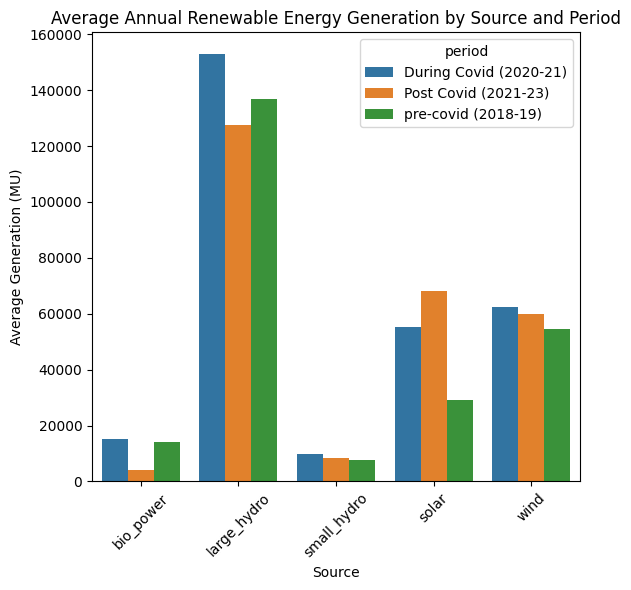

In [225]:
plt.figure(figsize=(6, 6))
sns.barplot(data=summary.reset_index(), x='source', y='avg_per_year', hue='period')
plt.title("Average Annual Renewable Energy Generation by Source and Period")
plt.ylabel("Average Generation (MU)")
plt.xlabel("Source")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Plot 1: Average Annual Renewable Energy Generation by Source and Period
Chart Type: Grouped Bar Chart

Title: Average Annual Renewable Energy Generation by Source and Period

Axes:

X-axis: Source (bio_power, large_hydro, small_hydro, solar, wind)
Y-axis: Average Generation (MU)
Legend:

period:
During Covid (2020-21)
Post Covid (2021-23)
pre-covid (2018-19)

This chart shows the average annual generation for different renewable energy sources across three distinct periods: pre-Covid, During Covid, and Post Covid.

large_hydro is clearly the dominant source of renewable energy generation among those shown, with significantly higher average generation than any other source in all periods.

bio_power and small_hydro contribute the least to average renewable energy generation, with consistently low levels across all periods.

Average generation from large_hydro was highest during the Covid period (2020-21), slightly lower in the Post Covid period, but still higher than pre-Covid levels.

Solar energy generation shows a strong increasing trend across the periods, being lowest pre-Covid, increasing during Covid, and reaching its highest average in the Post Covid period.

Wind energy generation also increased from the pre-Covid to the During Covid period. It slightly decreased in the Post Covid period compared to During Covid, but remained higher than pre-Covid levels.

The contributions of bio_power and small_hydro remained relatively stable and low throughout the three periods.

---------------------

#Regional Comparison Over Time

In [226]:
regional_summary = df_re_long.groupby(['region','period']).agg(total_genration=("generation",'sum')).reset_index()


In [227]:
regional_summary

,region,period,total_genration
0,ER,During Covid (2020-21),47417.520
1,ER,Post Covid (2021-23),37574.400
2,ER,pre-covid (2018-19),42637.400
3,IS,During Covid (2020-21),56.810
4,IS,Post Covid (2021-23),54.210
5,IS,pre-covid (2018-19),47.190
6,NER,During Covid (2020-21),11198.350
7,NER,Post Covid (2021-23),11939.550
8,NER,pre-covid (2018-19),10954.322
9,NR,During Covid (2020-21),181218.780


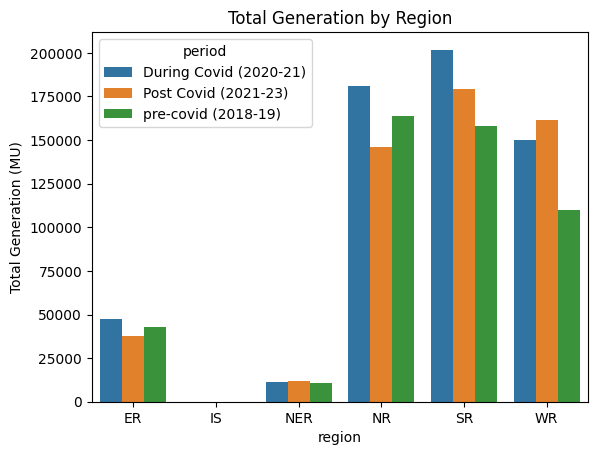

In [228]:
sns.barplot(data=regional_summary, x ="region",y="total_genration" ,hue="period")
plt.title("Total Generation by Region")
plt.ylabel("Total Generation (MU)")
plt.show()

Plot 2: Total Generation by Region
Chart Type: Grouped Bar Chart

Title: Total Generation by Region

Axes:

X-axis: Region (ER, IS, NER, NR, SR, WR)
Y-axis: Total Generation (MU)
Legend:

Period:
pre-covid (2018-19)
During Covid (2020-21)
Post Covid (2021-23)

The chart compares the total generation across six different regions during three distinct periods: pre-Covid, During Covid, and Post Covid.

IS and NER regions consistently show very low levels of total generation across all three periods compared to other regions.

ER region's total generation appears relatively stable across the periods, with slight variations.

NR, SR, and WR are the high-generation regions.

NR shows an increase during the Covid period, which is maintained or slightly decreased in the Post Covid period, but remains higher than pre-Covid.

SR has the highest generation overall and shows a peak during the Covid period, slightly decreasing in the Post Covid period but still higher than pre-Covid levels.

WR demonstrates a notable increase in total generation in the Post Covid period compared to both the During Covid and pre-Covid periods.

-----------------------

#State Wise Generation Heatmap

In [229]:
pivot = df_re_long.pivot_table(index="state",columns="year",values="generation", aggfunc="sum").fillna(0)

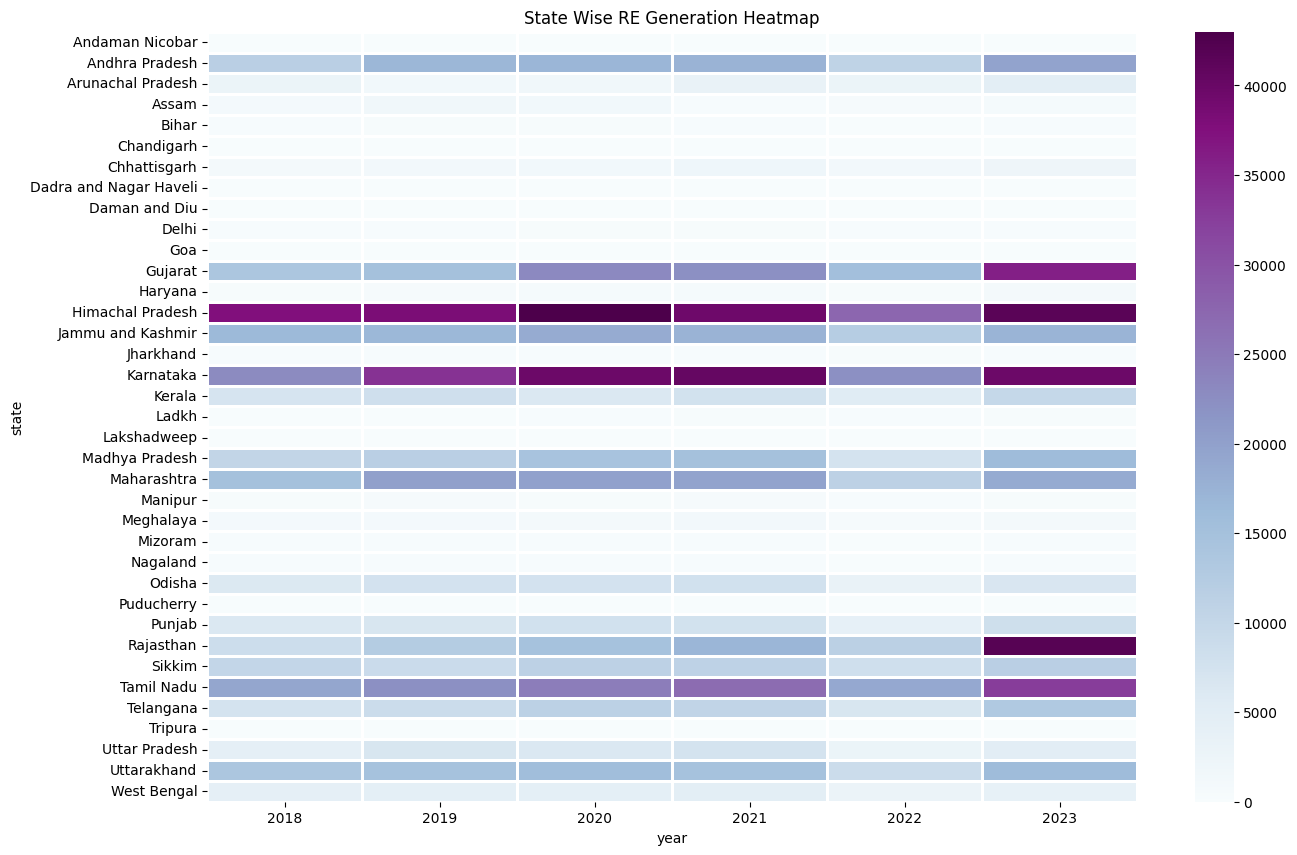

<Figure size 640x480 with 0 Axes>

In [230]:
plt.figure(figsize=(15,10))
sns.heatmap(pivot,cmap="BuPu",linewidths=1)
plt.title("State Wise RE Generation Heatmap")
plt.figure(facecolor="black")
plt.show()

Plot 3: State Wise RE Generation Heatmap
Chart Type: Heatmap

Title: State Wise RE Generation Heatmap

Axes:

Y-axis: State
X-axis: Year (2018-2023)
Color Intensity: Represents the level of Renewable Energy (RE) Generation (Higher values are darker purple, lower values are lighter blue).

Observations:

This heatmap visualizes the Renewable Energy generation across various Indian states and union territories from 2018 to 2023.
The majority of states show relatively low levels of RE generation throughout the years, indicated by the prevalent light blue color.
Several states consistently demonstrate high levels of RE generation across all the years (2018-2023), standing out with darker shades of purple. These include:
Himachal Pradesh
Jammu and Kashmir
Karnataka
Tamil Nadu

Rajasthan shows a significant increase in RE generation in the later years, particularly in 2022 and 2023, appearing much darker than in the earlier years.

The heatmap effectively highlights the key states that are leading in Renewable Energy generation.
Most other states show minimal changes in their low levels of RE generation over the observed period.


---------------------

#Top 10 State per source


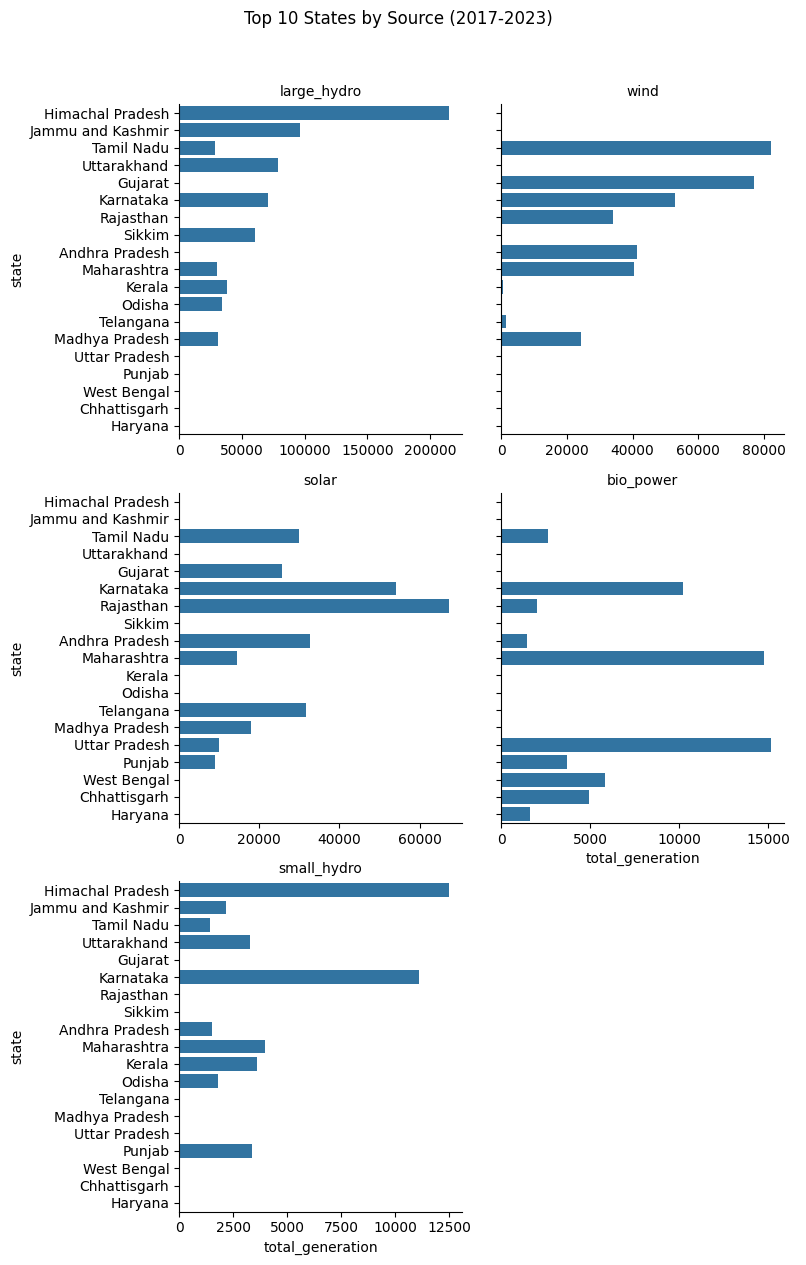

In [231]:
top_states = df_re_long.groupby(["source","state"]).agg(total_generation = ("generation","sum")).reset_index()

g= sns.catplot(data=top_states.sort_values("total_generation",ascending = False).groupby("source").head(10),x="total_generation" , y="state",col="source",kind="bar",col_wrap=2, sharex=False,height=4)
g.set_titles("{col_name}")
g.fig.suptitle("Top 10 States by Source (2017-2023)",y=1.05)
plt.show()

Plot 4: Top States by Source (2017-2023)
Chart Type: Faceted Horizontal Bar Charts

Title: Top 10 States by Source (2017-2023)

Axes:

Y-axis: State
X-axis: Total Generation (for each respective source)
Description:
This plot consists of multiple horizontal bar charts, each representing a different renewable energy source (large_hydro, wind, solar, bio_power, small_hydro). Each chart shows the top states that have contributed the most to the total generation from that specific source between 2017 and 2023.

Observations:

The charts highlight the leading states for each type of renewable energy generation.

Large Hydro: Himachal Pradesh is the dominant state for large hydro generation by a significant margin. Other notable states include Jammu and Kashmir, Uttarakhand, Gujarat, and Karnataka.

Wind: Tamil Nadu leads in wind power generation, followed closely by Gujarat and Karnataka. Andhra Pradesh, Rajasthan, and Maharashtra also have substantial wind generation.

Solar: Rajasthan is the top state for solar generation, followed by Gujarat and Andhra Pradesh. Karnataka, Telangana, Madhya Pradesh, and Tamil Nadu also show considerable solar generation.

Bio Power: Karnataka and Maharashtra appear to be the leading states for bio power. Uttar Pradesh and Punjab also contribute significantly.

Small Hydro: Himachal Pradesh is the primary contributor to small hydro generation, followed by Karnataka and Uttarakhand. Jammu and Kashmir, Sikkim, and Maharashtra also play a role.

Different states specialize in different types of renewable energy, reflecting geographical advantages and policy focus.

-------------

#Correlation Matrix (for generation sources)

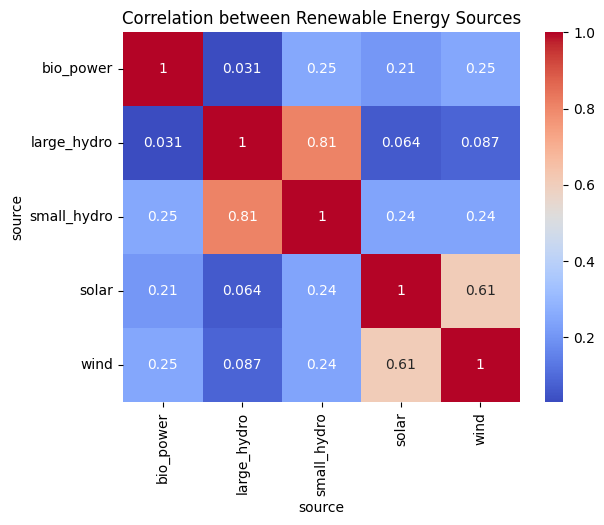

In [232]:
df_corr = df_re_long.pivot_table(index=["year", "state"], columns="source", values="generation", aggfunc="sum")
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Renewable Energy Sources")
plt.show()


Plot 5: Correlation between Renewable Energy Sources
Chart Type: Correlation Heatmap

Title: Correlation between Renewable Energy Sources

Axes:

X-axis: Renewable Energy Source
Y-axis: Renewable Energy Source
Color Intensity: Represents the correlation coefficient between the two sources (Red indicates strong positive correlation, Blue indicates weaker or negative correlation).

Observations:

This heatmap visualizes the pairwise correlation coefficients between the different renewable energy sources.

The diagonal cells show a correlation of 1, as expected, representing the perfect positive correlation of a source with itself.

There is a strong positive correlation between large_hydro and small_hydro (coefficient = 0.81). This suggests that as generation from large hydro sources increases, generation from small hydro sources also tends to increase, and vice versa.

There is a moderate positive correlation between solar and wind energy generation (coefficient = 0.61). This indicates a tendency for solar and wind generation to increase or decrease together, though not as strongly as large and small hydro.

The correlations between bio_power and all other sources are relatively low (coefficients ranging from 0.031 to 0.25), suggesting that bio power generation levels do not strongly correlate with the generation levels of the other renewable sources shown.

The correlations between the hydro sources (large and small) and the variable renewable sources (solar and wind) are relatively low (coefficients between 0.064 and 0.24). This is often expected as hydro can be more dispatchable, while solar and wind are intermittent.

All observed off-diagonal correlations in this heatmap are positive, indicating that there are no strong inverse relationships between these renewable energy sources in this dataset.

-------------------

#Bar Chart Race for Top 10 State by Top 10 States by Total Renewable Energy Generation (2017-2023)

In [233]:
import bar_chart_race as bcr
from IPython.display import HTML

In [234]:
df_bcr = (
    df_re_long.groupby(["year", "state"])
    .agg({"generation": "sum"})
    .reset_index()
    .pivot(index="year", columns="state", values="generation")
    .fillna(0)
)

In [235]:
from matplotlib.animation import FFMpegWriter
import matplotlib as mpl
mpl.rcParams['animation.ffmpeg_path'] = r"C:\ffmpeg-master-latest-win64-gpl\ffmpeg-master-latest-win64-gpl\bin\ffmpeg.exe"




In [236]:
bcr.bar_chart_race(
    df=df_bcr,
    filename='RE_generation_race.MP4',  # Use .gif instead of .mp4
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=20,
    interpolate_period=True,
    period_fmt=None,
    title='Top 10 States by Total Renewable Energy Generation (2017-2023)',
    bar_size=.95,
    period_length=2000
)
HTML("""
<video width="800" controls>
  <source src="RE_generation_race.MP4" type="video/mp4">
  Your browser does not support the video tag.
</video>
""")

c:\Users\rajas\AppData\Local\Programs\Python\Python312\Lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

c:\Users\rajas\AppData\Local\Programs\Python\Python312\Lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

c:\Users\rajas\AppData\Local\Programs\Python\Python312\Lib\site-packages\bar_chart_race\_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`



------------------------------

#State-wise Renewable Energy Generation Over Time (2017–2023) (Interactive)

In [237]:
df_re_long_geo = pd.read_csv(r"C:\Users\rajas\Documents\GitHub\Post-COVID-Energy-Forecasting\data_set\RE_LONG_FORMAT_2017_2023_WITH_GEO.csv")

In [238]:
import plotly.express as px

In [239]:
df_re_long_geo.columns = df_re_long_geo.columns.str.strip().str.lower()
df_re_long_geo.rename(columns={
    'state': 'State',
    'region': 'Region',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'generation': 'Generation',
    'year': 'Dates'
}, inplace=True)
df_re_long_geo = df_re_long_geo.dropna(subset=['Latitude', 'Longitude', 'Generation'])


In [240]:
fig = px.scatter_geo(
    df_re_long_geo,
    lat='Latitude',
    lon='Longitude',
    color='Region',
    hover_name='State',
    size='Generation',
    animation_frame='Dates',
    projection='natural earth',
    scope='asia',
    title='State-wise Renewable Energy Generation Over Time (2017–2023)'
)
fig.update_geos(
    lataxis_range=[6, 38],  
    lonaxis_range=[68, 98],  
    showcountries=True,
    countrycolor="Black",
    subunitcolor="black",
    showland=True,
    landcolor="lightgray",
    showocean=False,  
    showlakes=True,
    lakecolor="lightblue"
)
fig.update_layout(
    legend_title="Region"
)
fig.show()

--------------------------

#Top 10 States Contribution to Total RE Generation

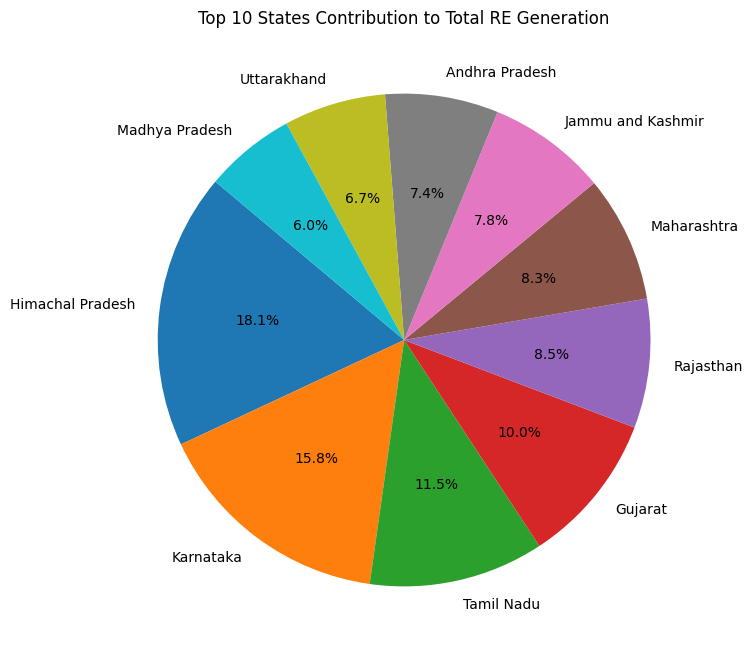

In [241]:
df_pie = df_re_long.groupby('state')['generation'].sum().reset_index()
df_pie = df_pie.sort_values('generation', ascending=False).head(10)

plt.figure(figsize=(8,8))
plt.pie(df_pie['generation'], labels=df_pie['state'], autopct='%1.1f%%', startangle=140)
plt.title("Top 10 States Contribution to Total RE Generation")
plt.show()


Plot 6: Top 10 States Contribution to Total RE Generation
Chart Type: Pie Chart

Title: Top 10 States Contribution to Total RE Generation

Description:
This pie chart illustrates the proportional contribution of the top 10 states to the total Renewable Energy (RE) generation among this group of states. Each slice represents a state, and its size corresponds to the percentage of the total RE generation from these top 10 that the state accounts for.

Observations:

The plot clearly shows the relative contribution of each of the top 10 states to the overall RE generation within this group.

Himachal Pradesh is the largest contributor among the top 10 states, accounting for 18.1% of the total RE generation from this group.

Karnataka is the second-largest contributor at 15.8%.

Tamil Nadu (11.5%) and Gujarat (10.0%) are also significant contributors, each accounting for over 10% of the total from this group.

Combined, the top four states (Himachal Pradesh, Karnataka, Tamil Nadu, and Gujarat) contribute a substantial portion (over 55%) of the total RE generation among these top 10 states.

The remaining states in the top 10 (Rajasthan, Maharashtra, Jammu and Kashmir, Andhra Pradesh, Uttarakhand, and Madhya Pradesh) each contribute between 6% and 8.5%.

This plot effectively visualizes the unequal distribution of RE generation even among the leading states.

-----------

#Renewable Energy Generation Trends by Source

In [242]:
df_line = df_re_long.groupby(['year', 'source'])['generation'].sum().reset_index()

fig = px.line(df_line, x='year', y='generation', color='source',
              title='Renewable Energy Generation Trends by Source (Interactive)',
              markers=True)
fig.update_layout(xaxis_title='Year', yaxis_title='Generation (MU)')
fig.show()


Plot 7: Renewable Energy Generation Trends by Source (Interactive)
Chart Type: Line Chart

Title: Renewable Energy Generation Trends by Source (Interactive)

Axes:

X-axis: Year (2018-2023)
Y-axis: Generation (MU)
Legend:

Source: bio_power, large_hydro, small_hydro, solar, wind (each represented by a different colored line)

Observations:

This line chart visualizes the annual generation trends for different renewable energy sources from 2018 to 2023.
large_hydro is the dominant source of generation, showing the highest values throughout the years, although its generation fluctuates significantly. 

There's a noticeable dip in 2022 followed by a strong recovery in 2023.
bio_power and small_hydro consistently show very low generation levels compared to the other sources, with relatively flat trends across the years.

Solar energy generation shows a clear and strong increasing trend over the entire period, with a particularly steep rise from 2022 to 2023. By 2023, it becomes the second-largest source of generation, surpassing wind.

Wind energy generation also shows an increasing trend from 2018 to 2021, experiences a dip in 2022 (similar to large hydro), and then increases again in 2023, though its growth in 2023 is less pronounced than solar's.

The plot highlights the dynamic nature of renewable energy generation, particularly the growth in solar and wind power and the fluctuations in hydro generation. The year 2022 appears to be a period where generation dipped for some key sources (large hydro, wind), before a strong rebound in 2023 for large hydro and solar.

------

#Total Generation by Region Over Years

In [243]:
df_region = df_re_long.groupby(['year', 'region'])['generation'].sum().reset_index()
fig = px.bar(df_region, x='year', y='generation', color='region', barmode='group',
             title='Total Generation by Region Over Years')
fig.show()


PLot 8:Total Generation by Region Over Years
Chart Type: Grouped Bar Chart

Title: Total Generation by Region Over Years

Axes:

X-axis: Year (2018-2023)
Y-axis: Generation
Legend:

Region: ER, IS, NER, NR, SR, WR (represented by different colors)

This chart displays the trend of total generation for each region year-on-year from 2018 to 2023.


IS and NER regions consistently show the lowest generation levels throughout all the years, with minimal variation.

ER region's generation remains relatively constant across the years displayed.

NR, SR, and WR regions are the primary contributors to total generation and show more significant changes over time.

NR generation fluctuates, generally showing higher levels from 2019-2021 compared to 2018 and a dip in 2022 before recovering slightly in 2023.

SR generation generally trends upwards from 2018 to 2021, shows a noticeable dip in 2022, and then experiences a significant surge in 2023, reaching 
the highest levels among all regions in that year.

WR generation also shows an increasing trend from 2018 to 2021, dips in 2022, and then sees a dramatic increase in 2023, reaching levels comparable to SR in 2023.

A common pattern observed in NR, SR, and WR is a dip in generation in 2022 followed by a strong increase in 2023.

---------------------------------------

#Distribution of Generation by Source (with outliers)


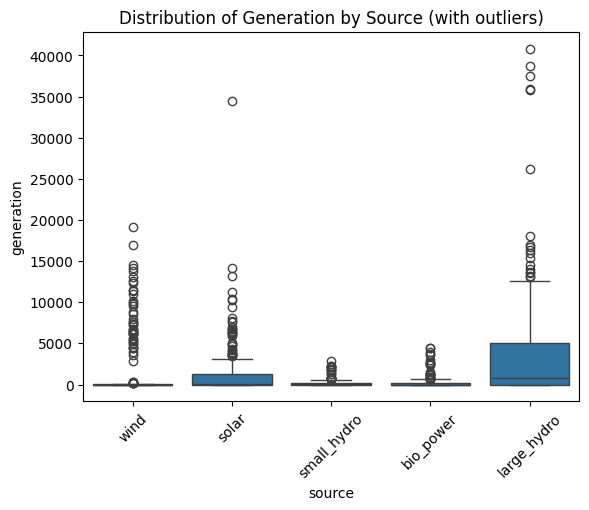

In [244]:
sns.boxplot(data=df_re_long, x='source', y='generation')
plt.title("Distribution of Generation by Source (with outliers)")
plt.xticks(rotation=45)
plt.show()


Plot 9: Distribution of Generation by Source (with outliers)
Chart Type: Box Plot

Title: Distribution of Generation by Source (with outliers)

Axes:

X-axis: Source (wind, solar, small_hydro, bio_power, large_hydro)
Y-axis: Generation
Description:
This plot displays the distribution of generation values for each renewable energy source using box plots. Each box plot shows the median (line in the box), the interquartile range (IQR, the box), the whiskers (extending to a certain range beyond the IQR), and individual points representing outliers.

Observations:

The box plots reveal the spread and central tendency of generation for each renewable energy source, as well as the presence of extreme values (outliers).

large_hydro has the highest median generation and the largest interquartile range (box), indicating that it generally produces significantly more energy and has a wider variation in generation compared to all other sources. It also has outliers representing very high generation instances.

wind and solar have much lower median and IQR values compared to large hydro, but show a considerable number of outliers that extend to moderate to high generation values, suggesting that while their typical generation is lower, they can have periods of high output.

small_hydro and bio_power consistently show the lowest median and IQR values, concentrated close to zero. They also have outliers, but these outliers represent much lower generation values compared to the outliers seen in wind, solar, or large hydro.

The plot clearly shows that large_hydro operates at a significantly different scale of generation compared to the other renewable sources.

The presence of numerous outliers for wind and solar highlights the variability and intermittent nature of these sources, where generation can sometimes be much higher than the typical levels.

-----------------

Overall EDA Summary: Renewable Energy Generation Analysis

This Exploratory Data Analysis (EDA) focuses on understanding the trends, distributions, and contributions of various renewable energy sources across different regions and states, as well as their correlations, primarily covering the period from 2018 to 2023.

Key Findings and Trends:

Regional Disparity: 

The total renewable energy generation is highly concentrated in a few key regions, namely NR (Northern Region), SR (Southern Region), and WR (Western Region). Regions like IS (Island States) and NER (North Eastern Region) consistently show very low generation.

Growth and Fluctuations Over Time:

Overall RE generation has shown an upward trend, particularly in the Post-Covid period (2021-23) compared to pre-Covid (2018-19).
A notable pattern is observed in the major generating regions and sources: a dip in generation in 2022, followed by a strong recovery or surge in 2023. This suggests a potential widespread factor affecting generation in 2022.

Dominant Sources and Emerging Trends:

Large Hydro is currently the largest contributor to renewable energy generation, but its output shows significant year-on-year fluctuations, including a notable dip in 2022 before a strong recovery in 2023.
Solar energy exhibits a consistent and robust increasing trend throughout the analysis period (2018-2023). It experienced a particularly steep rise from 2022 to 2023, eventually surpassing wind generation to become the second-largest source.
Wind energy is also a substantial contributor, showing growth over the years, though its growth trajectory and recovery in 2023 are less pronounced than solar. It also experienced a dip in 2022.
Bio-power and Small Hydro contribute minimally to the overall renewable energy mix and maintain relatively stable and low generation levels across all periods.

Geographical Specialization and Contribution:

The RE generation is highly localized, with only a handful of states contributing significantly.
The Top 10 contributing states are Himachal Pradesh, Karnataka, Tamil Nadu, and Gujarat, collectively accounting for a substantial portion of the total RE generation among this leading group.
States often show specialization in particular renewable energy sources:
Himachal Pradesh excels in both Large Hydro and Small Hydro.
Tamil Nadu is a leader in Wind energy generation.
Rajasthan stands out as the top state for Solar energy generation, showing a significant increase in recent years (2022-2023).
Karnataka and Maharashtra are notable for their Bio Power generation.

Correlations and Distribution Characteristics:

A strong positive correlation (0.81) exists between large_hydro and small_hydro generation, indicating that these sources often perform similarly.
A moderate positive correlation (0.61) is observed between solar and wind generation, suggesting some level of synchronized output, which is crucial for grid management.

The distributions of generation by source highlight the varying scales and variabilities:

Large Hydro has the highest median generation and the widest interquartile range, indicating its significant output and inherent variability.
Wind and Solar sources, while having lower typical generation, show numerous outliers representing periods of very high generation, underscoring their intermittent nature.
Small Hydro and Bio-power have very low generation distributions, mostly concentrated near zero, with limited high-value outliers.

Overall Conclusion for EDA:

The analysis reveals that India's renewable energy landscape is characterized by strong growth, particularly in solar and wind sectors, concentrated within specific regions and states. While large hydro remains a major contributor, its generation shows more volatility. The observed dip in 2022 across multiple major sources and regions warrants further investigation, as does the substantial rebound in 2023. Understanding the geographical strengths in different RE sources can inform strategic planning for future renewable energy expansion and grid integration.

In [245]:
lakshadweep_data = df_re_long_geo[df_re_long_geo['State'].str.lower() == 'lakshadweep']

# Group by year (or "Dates", depending on your column name) and sum generation
generation_by_year = lakshadweep_data.groupby('Dates')['Generation'].sum().reset_index()

# Display result
print(generation_by_year)

     Dates  Generation
0  2017-18        1.46
1  2018-19        1.11
2  2019-20        0.66
3  2020-21        0.45
4  2021-22        0.15
5  2022-23        0.10
